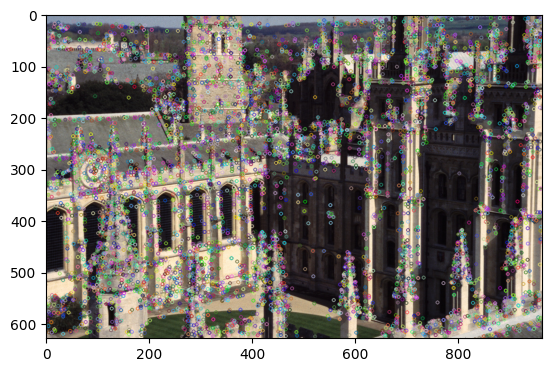

In [1]:
# Q1a: Compute the SIFT features of the given image House.png

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
I = cv2.imread("House.png", cv2.IMREAD_COLOR)

# Create SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(I, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(I, keypoints, None)

# Show the image with keypoints
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Q1b: Compute the SIFT features of the given image House.png with reduced keypoints

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
I = cv2.imread("House.png", cv2.IMREAD_COLOR)

# Create SIFT object with reduced keypoints
sift = cv2.SIFT_create()

# Get the default keypoint list
default_keypoints = sift.detect(I)

# Calculate the target number of keypoints (10% of the default)
target_keypoint_count = int(len(default_keypoints) * 0.1)

print("Default number of keypoints: ", len(default_keypoints))
print("Target number of keypoints: ", target_keypoint_count)

# Set the number of keypoints to target_keypoint_count
sift.setNFeatures(target_keypoint_count)

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(I, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(I, keypoints, None)

# Show the image with keypoints
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Q2a: Recompute the SIFT features for a noisy version of House.png.

import cv2
import numpy as np
from skimage.util import random_noise
from matplotlib import pyplot as plt

# Read the image
I = cv2.imread("House.png", cv2.IMREAD_COLOR)

# Convert the image to RGB format
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Add pepper noise to the image
noise_img = random_noise(I, mode='pepper')

# Display the noisy image
plt.imshow(noise_img)


In [ ]:
# Q2b: Recompute the SIFT features for a noisy version of House.png.

import cv2
import numpy as np
from skimage.util import random_noise
from matplotlib import pyplot as plt

# Read the image
I = cv2.imread("House.png", cv2.IMREAD_COLOR)

# Add pepper noise to the image
noise_img = random_noise(I, mode='pepper')

noise_img = np.array(255 * noise_img, dtype='uint8')

# Create SIFT object with reduced keypoints
sift = cv2.SIFT_create()

# Get the default keypoint list
default_keypoints = sift.detect(noise_img)

# Calculate the target number of keypoints (10% of the default)
target_keypoint_count = int(len(default_keypoints) * 0.1)

print("Default number of keypoints: ", len(default_keypoints))
print("Target number of keypoints: ", target_keypoint_count)

# Set the number of keypoints to target_keypoint_count
sift.setNFeatures(target_keypoint_count)

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(noise_img, None)

# Draw keypoints on the image
img_with_keypoints = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
cv2.drawKeypoints(img_with_keypoints, keypoints, img_with_keypoints)

# Show the image with keypoints
plt.imshow(img_with_keypoints)
plt.show()

# Q2c Inspect the keypoints visually
- Q: Are the keypoints of the noisy image roughly the same as those of the original image? 
  - A: Yes, they are roughly the same.

- Q: What does this mean?
  - A: It means that the SIFT are robust to noise.

In [ ]:
# Q3a: Match and stitch two given images Scene1.png and Scene2.png.

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
I1 = cv2.imread("Scene1.png", cv2.IMREAD_COLOR)
I2 = cv2.imread("Scene2.png", cv2.IMREAD_COLOR)

def sift(I):
    # Create SIFT object
    sift = cv2.SIFT_create(nfeatures=150)

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(I, None)

    return keypoints, descriptors

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift(I1)
keypoints2, descriptors2 = sift(I2)

# Show the image with keypoints
img_with_keypoints1 = cv2.drawKeypoints(I1, keypoints1, None, color=(0,0,255))
img_with_keypoints2 = cv2.drawKeypoints(I2, keypoints2, None, color=(0,0,255))

# Show the image with keypoints
plt.imshow(cv2.cvtColor(img_with_keypoints1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_with_keypoints2, cv2.COLOR_BGR2RGB))
plt.show()


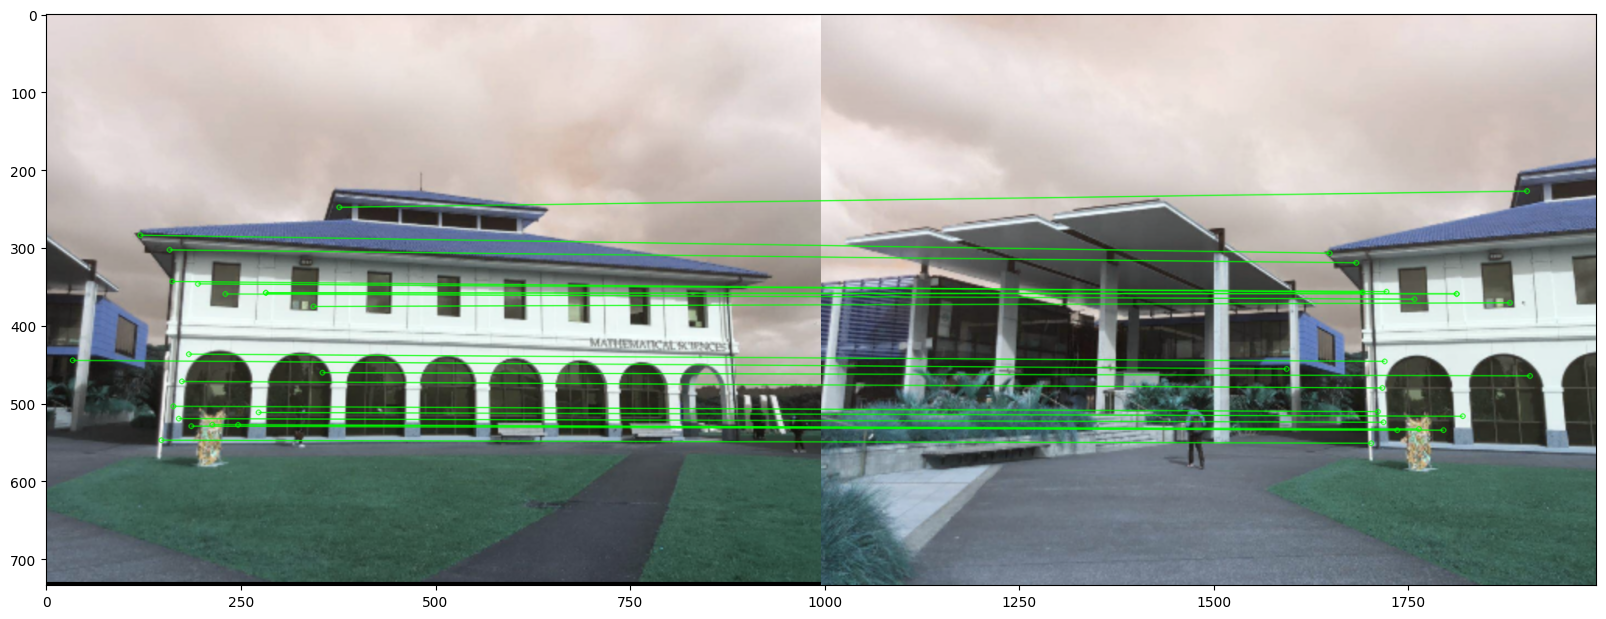

In [2]:
# Q3b: Match and stitch two given images Scene1.png and Scene2.png.

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
I1 = cv2.imread("Scene1.png", cv2.IMREAD_COLOR)
I2 = cv2.imread("Scene2.png", cv2.IMREAD_COLOR)

def sift(I):
    # Create SIFT object
    sift = cv2.SIFT_create(nfeatures=150)

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(I, None)

    return keypoints, descriptors

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift(I1)
keypoints2, descriptors2 = sift(I2)

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
img_matches = cv2.drawMatches(I1, keypoints1, I2, keypoints2, matches[:20], None, matchColor=(0, 255, 0), flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the matches
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()


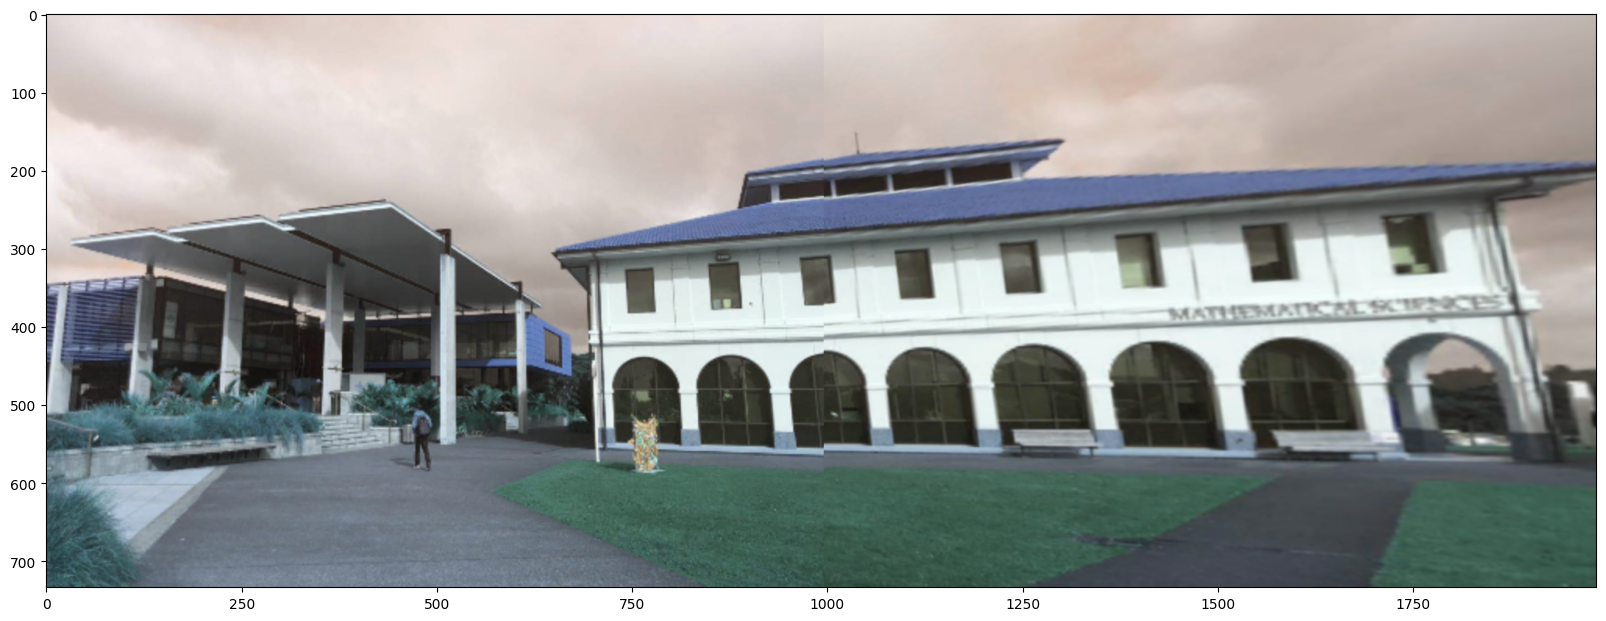

In [1]:
# Q3c: Match and stitch two given images Scene1.png and Scene2.png.

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
I1 = cv2.imread("Scene1.png", cv2.IMREAD_COLOR)
I2 = cv2.imread("Scene2.png", cv2.IMREAD_COLOR)

def sift(I):
    # Create SIFT object
    sift = cv2.SIFT_create(nfeatures=150)

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(I, None)

    return keypoints, descriptors

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift(I1)
keypoints2, descriptors2 = sift(I2)

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Select best matches
best_matches = matches[:20]

# Get corresponding keypoints
keypoints1 = np.float32([keypoints1[m.queryIdx].pt for m in best_matches]).reshape(-1, 1, 2)
keypoints2 = np.float32([keypoints2[m.trainIdx].pt for m in best_matches]).reshape(-1, 1, 2)

# Use RANSAC algorithm to estimate the mapping
M, mask = cv2.findHomography(keypoints1, keypoints2, cv2.RANSAC)

# Get height and width of both images
h1, w1 = I1.shape[:2] 
h2, w2 = I2.shape[:2]

# Transform the corners of the second image to get the size of the stitched image
pt = cv2.perspectiveTransform(keypoints2, M)
max_h = max(int(pt[:,:,1].max()), h1, h2)
max_w = max(int(pt[:,:,0].max()), w1, w2)

# Warp the first image to the second image using the estimated mapping
warped_img = cv2.warpPerspective(I1, M, (max_w, max_h))

# Overlay the second image on top of the first image
warped_img[0:h2, 0:w2] = I2

# Show the stitched image
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))
plt.show()
